<a href="https://colab.research.google.com/github/Antonio-Belo/MVP-ABBP/blob/main/MVP_ADBP_Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint I  - Análise de Dados e Boas Práticas**

>*Data Science & Analytics - PUC Rio*

>*Antonio Carlos Avallone Belo*

## **1. Definição do Problema**

<h4 align="justify">O dataset usado será o <b>Data Science Salaries 2023</b> (Salaries of Different Data Science Fields in the Data Science Domain) disponibilizada pelo Kaggle

<h4 align="justify"> O principal objetivo desta análise é obter uma compreensão abrangente das tendências salariais no mercado de trabalho das ciências dos dados e identificar os principais factores que influenciam a remuneração. Ao explorar o conjunto de dados e realizar visualizações de dados perspicazes, pretendo descobrir informações valiosas, como os padrões de crescimento salarial ao longo dos anos, o impacto dos níveis de experiência e dos tipos de emprego nos salários, as variações geográficas na remuneração e a influência das oportunidades de trabalho remoto.
<h4 align="justify"> Ao aprofundar estes aspectos, este projeto de análise de dados fornecerá recomendações práticas tanto para os analistas de dados que procuram oportunidades de emprego como para os empregadores que procuram atrair os melhores talentos. As conclusões desta análise permitirão que os analistas de dados tomem decisões informadas sobre as suas carreiras, enquanto as entidades patronais podem adaptar as suas estratégias de contratação e estruturas de remuneração para atrair profissionais especializados em ciências dos dados de forma eficaz. </i>

<a> Fonte: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

**O conjunto de dados "Data Science Job Salaries" é composto por 11 colunas** :




*   **work_year** [categorico]  -> <i align="justify">Representa o ano específico em que o salário foi pago. Anos diferentes podem ter condições económicas diferentes que podem ter impacto no nível salarial. </i>

*   **experience_level** [categórico] -> <i align="justify">O nível de experiência que uma pessoa tem num determinado emprego. Trata-se de um fator determinante no cálculo do salário, dado que, normalmente, os indivíduos mais experientes recebem salários mais elevados devido às suas competências e conhecimentos avançados. </i>

*   **employment_type** [categorico] -> <i align="justify">A natureza do contrato de trabalho, como tempo inteiro, tempo parcial ou contrato, pode influenciar grandemente o salário. Os empregados a tempo inteiro têm frequentemente salários anuais mais elevados em comparação com os seus colegas de tempo parcial ou contratuais. </i>

*   **job_title** [categórico]: <i align="justify">A função que um indivíduo desempenha numa empresa. As diferentes funções têm diferentes escalas salariais com base nas responsabilidades e competências exigidas. Por exemplo, as funções de gestão pagam normalmente mais do que as posições de nível de entrada. </i>

*   **salário** [numérico] : <i align="justify">O salário bruto total pago ao indivíduo. Este é diretamente influenciado por fatores como o nível de experiência, o cargo e o tipo de emprego. </i>

*  **salary_currency** [categorical] : <i align="justify">A moeda específica em que o salário é pago, indicada por um código ISO 4217. As taxas de câmbio podem afetar o valor do salário quando convertido em diferentes moedas.</i>

*   **salaryinusd** [numérico] : <i align="justify">O montante total do salário bruto convertido em dólares americanos. Isto permite uma comparação uniforme dos salários em diferentes países e moedas. </i>

*   **employee_residence** [categórico]: <i align="justify">O país principal de residência do empregado, indicado por um código ISO 3166. O custo de vida e as taxas salariais prevalecentes no país de residência do empregado podem afetar os níveis salariais. </i>

*   **remote_ratio** : <i align="justify">A proporção de trabalho efetuado remotamente. Com o aumento do trabalho remoto, as empresas podem ajustar os salários com base no custo de vida na localização do empregado e na proporção de trabalho remoto. </i>

*   **company_location** [categorical]:<i align="justify"> A localização do escritório principal do empregador ou da sucursal que detém o contrato. As empresas em diferentes localizações podem oferecer diferentes tabelas salariais devido a diferentes condições económicas e custo de vida.</i>

*  **company_size**  [categórico]: <i align="justify">O número médio de trabalhadores da empresa durante o ano de trabalho. As empresas maiores têm frequentemente tabelas salariais estruturadas e podem oferecer salários mais elevados devido a economias de escala e a maiores fluxos de receitas. </i>



  












<h4><b>Domínios variáveis categóricas</b>
</h>

**company_size** - **Porte**

|Código|Descrição|
|---|---|
|L|Grande|
|M|Média|
|S|Pequena|

**experience_level** - **experiencia**

|Código|Descrição|
|---|---|
|EN|Entry-level|
|MI|Mid-level|
|SE|Senior-level|
|EX|Executive-level|


**employment_type** - **tp_emprego**

|Código|Descrição|
|---|---|
|CT|Contrato|
|FL|Free Lancer|
|FT|Full Time|
|PT|Part Time|





**Preparação do Ambiente**

In [1]:
#  imports
import pandas                as pd
import numpy                 as np
import matplotlib            as mp
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno             as ms                 # para tratamento de missings
import plotly.express        as px                 # plotar mapas
import matplotlib.pyplot     as plt
#
from matplotlib              import cm
from pandas                  import set_option
from pandas.plotting         import scatter_matrix
from sklearn.preprocessing   import MinMaxScaler   # normalização
from sklearn.preprocessing   import StandardScaler # padronização
from sklearn.preprocessing   import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing   import OneHotEncoder  # one-hot e dummy encoding
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import classification_report
from sklearn.tree            import DecisionTreeClassifier
#adicionando a base para a feature selection
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from imblearn.over_sampling    import SMOTE   # fazer o balanceamento


In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## **2. Carga de Dados**



In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Antonio-Belo/MVP-ABBP/main/ds_salaries.csv"

# Renomeando as colunas
new_columns = {
    'work_year'         : 'ano',
    'experience_level'  : 'experiencia',
    'employment_type'   : 'tp_emprego',
    'job_title'         : 'cargo',
    'salary'            : 'salario',
    'salary_currency'   : 'moeda',
    'salary_in_usd'     : 'salario_usd',
    'employee_residence': 'residencia',
    'remote_ratio'      : 'remoto_perc',
    'company_location'  : 'local_job',
    'company_size'      : 'porte'
}

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=new_columns, skiprows=1, delimiter=',')
dataset.rename(columns=new_columns, inplace=True)
#
df_orig = pd.read_csv(url, names=new_columns, skiprows=1, delimiter=',')
df_orig.rename(columns=new_columns, inplace=True)
#

In [4]:
dataset.head()

,ano,experiencia,tp_emprego,cargo,salario,moeda,salario_usd,residencia,remoto_perc,local_job,porte
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## **3. Análise de Dados**





### **3.1. Estatísticas Descritivas**

In [5]:
# Mostra as dimensões do dataset
print(dataset.shape)

(3755, 11)


In [6]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano          3755 non-null   int64 
 1   experiencia  3755 non-null   object
 2   tp_emprego   3755 non-null   object
 3   cargo        3755 non-null   object
 4   salario      3755 non-null   int64 
 5   moeda        3755 non-null   object
 6   salario_usd  3755 non-null   int64 
 7   residencia   3755 non-null   object
 8   remoto_perc  3755 non-null   int64 
 9   local_job    3755 non-null   object
 10  porte        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


In [7]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,ano,experiencia,tp_emprego,cargo,salario,moeda,salario_usd,residencia,remoto_perc,local_job,porte
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [8]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,ano,experiencia,tp_emprego,cargo,salario,moeda,salario_usd,residencia,remoto_perc,local_job,porte
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [9]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes


ano             int64
experiencia    object
tp_emprego     object
cargo          object
salario         int64
moeda          object
salario_usd     int64
residencia     object
remoto_perc     int64
local_job      object
porte          object
dtype: object

In [10]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,ano,salario,salario_usd,remoto_perc
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


A coluna salário juntamente com a moeda corrente irão ser eliminadas na etapa de limpeza , pois iremos trabalhar com o campo salario_usd  , que já é o mesmo valor convertido para dolar. Importante verificar que o valor máximo apresenta um valor aparentemente muito alto em relação ao valor mínimo, podendo ser ,ou um cargo muito diferenciado  , ou a presença de um outlier , que veremos mais a frente nas visualizações.


In [11]:
# Domínios
print('Ano de Trabalho')
print(dataset['ano'].unique())
print(dataset.groupby('ano').size())
print('-------------------------------------')
print('Experiencia')
print(dataset['experiencia'].unique())
print(dataset.groupby('experiencia').size())
print('-------------------------------------')
print('Tamanho da Empresa')
print(dataset['porte'].unique())
print(dataset.groupby('porte').size())
print('-------------------------------------')
print('Tipo Enprego')
print(dataset['tp_emprego'].unique())
print(dataset.groupby('tp_emprego').size())
print('-------------------------------------')
print('Trabalho Remoto %')
print(dataset['remoto_perc'].unique())
print(dataset.groupby('remoto_perc').size())
print('-------------------------------------')
print('Local de Residência')
print(dataset['residencia'].unique())
print('-------------------------------------')
print('Local Trabalho Sede')
print(dataset['local_job'].unique())

Ano de Trabalho
[2023 2022 2020 2021]
ano
2020      76
2021     230
2022    1664
2023    1785
dtype: int64
-------------------------------------
Experiencia
['SE' 'MI' 'EN' 'EX']
experiencia
EN     320
EX     114
MI     805
SE    2516
dtype: int64
-------------------------------------
Tamanho da Empresa
['L' 'S' 'M']
porte
L     454
M    3153
S     148
dtype: int64
-------------------------------------
Tipo Enprego
['FT' 'CT' 'FL' 'PT']
tp_emprego
CT      10
FL      10
FT    3718
PT      17
dtype: int64
-------------------------------------
Trabalho Remoto %
[100   0  50]
remoto_perc
0      1923
50      189
100    1643
dtype: int64
-------------------------------------
Local de Residência
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'D

In [12]:
dataset['experiencia'] = dataset['experiencia'].replace('EN','Entry-level')
dataset['experiencia'] = dataset['experiencia'].replace('MI','Mid-level')
dataset['experiencia'] = dataset['experiencia'].replace('SE','Senior-level')
dataset['experiencia'] = dataset['experiencia'].replace('EX','Executive-level')
#
dataset['remoto_perc'] = dataset['remoto_perc'].replace(  0, 'Presencial')
dataset['remoto_perc'] = dataset['remoto_perc'].replace(  50,'Hibrido')
dataset['remoto_perc'] = dataset['remoto_perc'].replace( 100,'Trabalho Remoto')
#
dataset['porte'] = dataset['porte'].replace('L' ,'Grande')
dataset['porte'] = dataset['porte'].replace('S' ,'Pequena')
dataset['porte'] = dataset['porte'].replace('M' ,'Media')


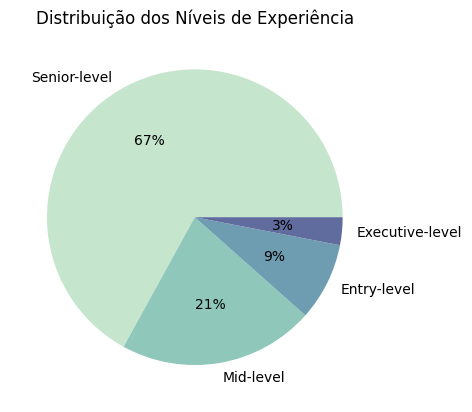

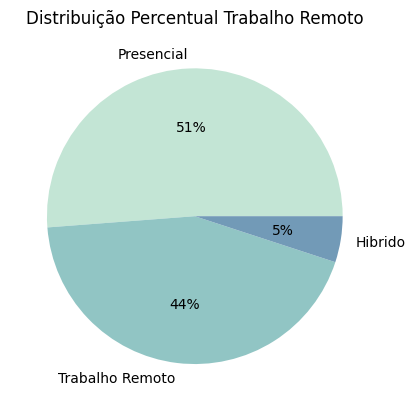

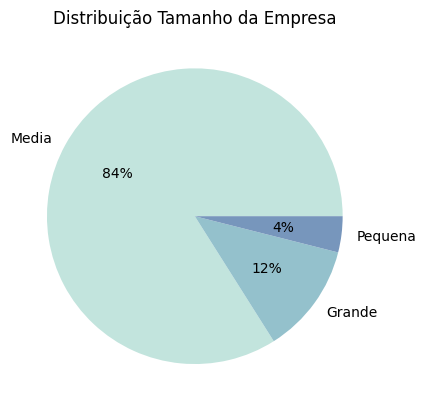

In [13]:
colors = sns.cubehelix_palette(start=.8, rot=-.7)
experience_vals = dataset['experiencia'].value_counts()
plt.pie(experience_vals, labels = experience_vals.index.to_list(), colors = colors, autopct='%.0f%%')
plt.title('Distribuição dos Níveis de Experiência')
plt.show()
#
colors = sns.cubehelix_palette(start=.7, rot=-.6)
remote_vals = dataset['remoto_perc'].value_counts()
plt.pie(remote_vals, labels = remote_vals.index.to_list(), colors = colors, autopct='%.0f%%')
plt.title('Distribuição Percentual Trabalho Remoto')
plt.show()
#
colors = sns.cubehelix_palette(start=.6, rot=-.5)
porte_vals = dataset['porte'].value_counts()
plt.pie(porte_vals, labels = porte_vals.index.to_list(), colors = colors, autopct='%.0f%%')
plt.title('Distribuição Tamanho da Empresa')
plt.show()


**Campo Salário em Dolar**

In [14]:
# Mediana do Salario em Relação ao Nível de Experiência
job_expe = dataset.groupby('experiencia').agg({'salario_usd':'median'}).sort_values('salario_usd', ascending=False)
job_expe

,salario_usd
experiencia,
Executive-level,196000.0
Senior-level,146000.0
Mid-level,100000.0
Entry-level,70000.0


Text(0, 0.5, 'Salary')

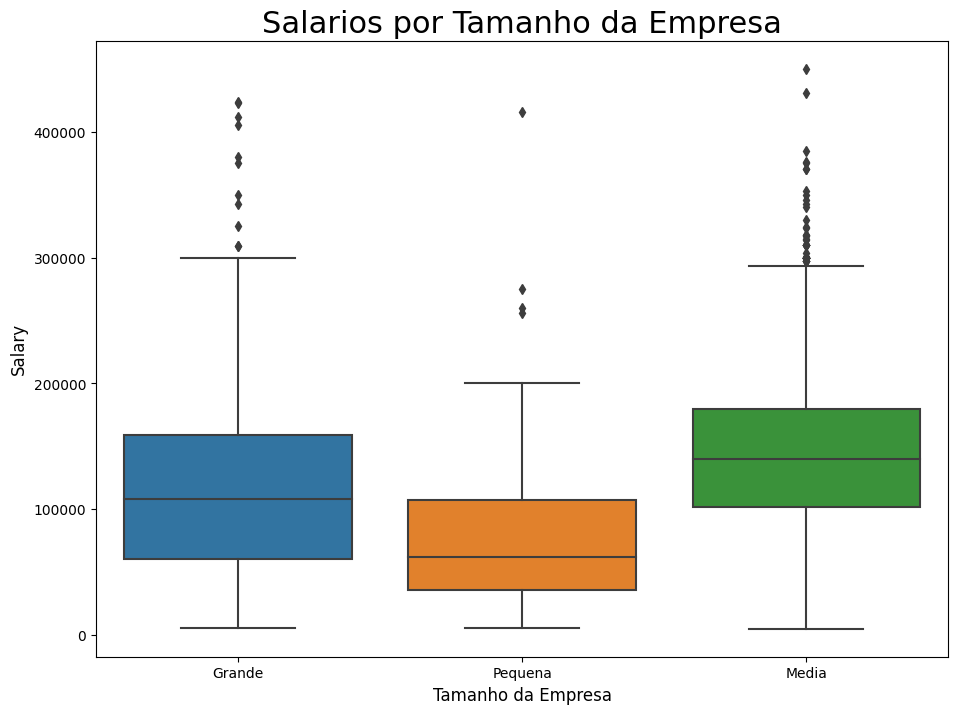

In [15]:
plt.figure(figsize=(11,8))
ax= sns.boxplot(x='porte', y='salario_usd', data=dataset)
plt.title('Salarios por Tamanho da Empresa', size=22, loc='center')
plt.xlabel('Tamanho da Empresa', size=12)
plt.ylabel('Salary', size=12)

**Distribuição trabalho remoto por nível de experiência**

Text(0.5, 1.0, 'Trabalho Remoto por Nível de Experiência')

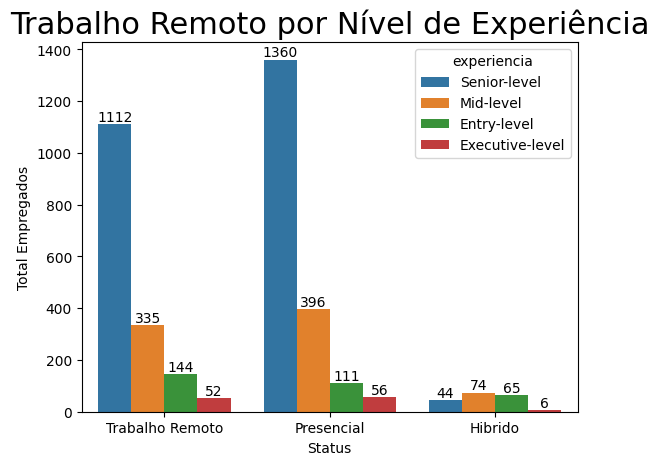

In [16]:
ax = sns.countplot(x='remoto_perc',hue='experiencia', data=dataset)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Status')
plt.ylabel('Total Empregados')
plt.title("Trabalho Remoto por Nível de Experiência", fontsize=22)

**Distribuição Trabalho Remoto por Ano**

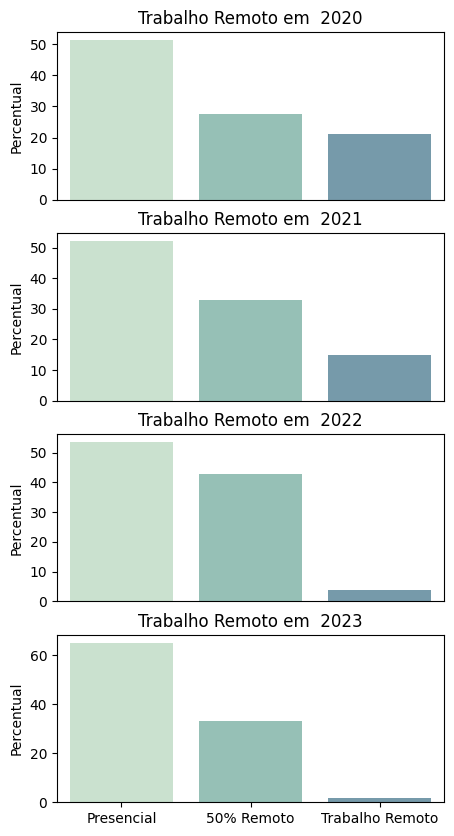

In [17]:
#
fig, axs = plt.subplots(4, 1, figsize=(5, 10))
#
for i, year in enumerate([2020, 2021, 2022, 2023]):
    year_df = dataset[dataset['ano'] == year]
    remote_ratio_counts = year_df['remoto_perc'].value_counts(normalize=True)
    colors = sns.cubehelix_palette(start=.8, rot=-.7)
    sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_counts.values*100, ax=axs[i], palette=colors)
    axs[i].set_title(f'Trabalho Remoto em  {year}')
    axs[i].set_ylabel('Percentual')
    if year == 2023:
        axs[i].set_xticklabels(['Presencial', '50% Remoto','Trabalho Remoto'])
    else:
        axs[i].set_xticks([])
    axs[i].set_xlabel('')

plt.show()

**Distribuição Salário por Ano de Experiência**

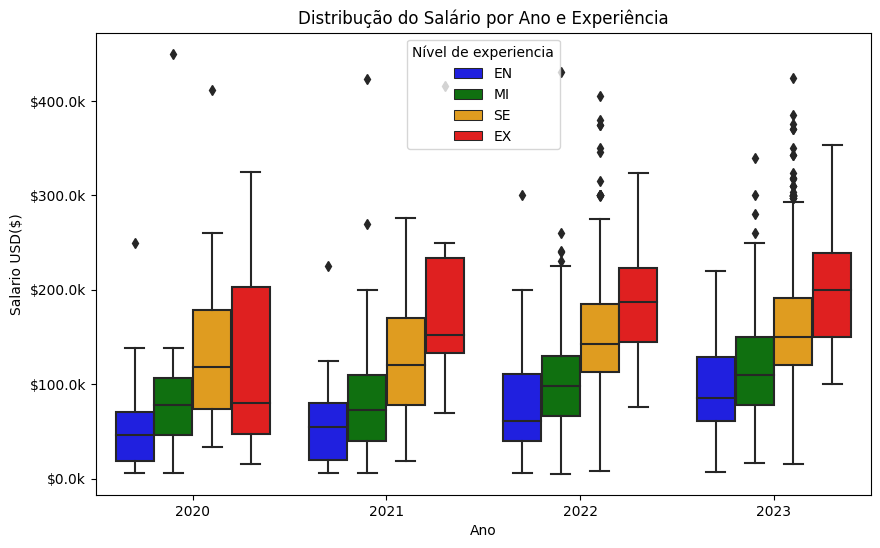

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
# Boxplot
sns.boxplot(x='ano', y='salario_usd', hue='experiencia', data=df_orig,
            hue_order=['EN', 'MI', 'SE', 'EX'],
            palette=['blue', 'green', 'orange', 'red'],
            ax=ax)

ax.set_ylabel('Salario USD($)')
y_ticks = np.arange(0, dataset['salario_usd'].max(), 100000)
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'${i/1000}k' for i in y_ticks])
ax.set_xlabel('Ano')
ax.set_title('Distribução do Salário por Ano e Experiência')
ax.legend(title='Nível de experiencia')

plt.show()



**Distribuição por Nível de Experiência por Ano**

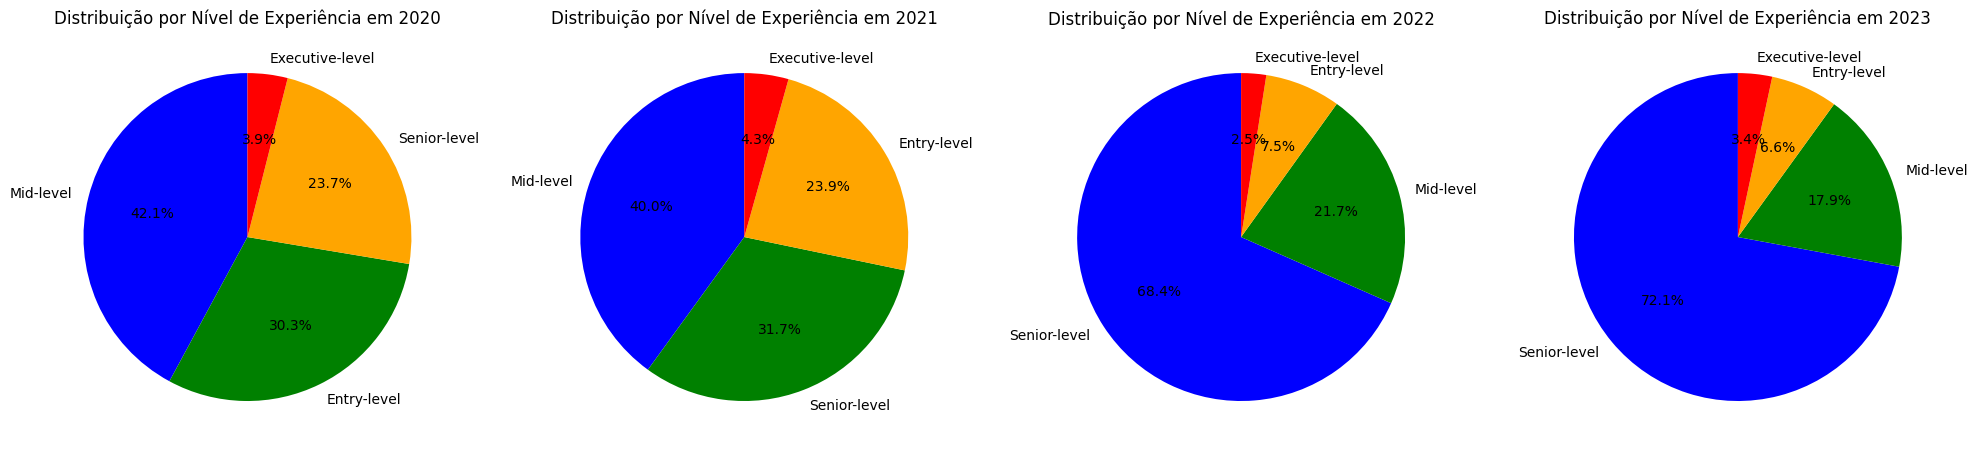

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

years = sorted(df_orig['ano'].unique())

for i, year in enumerate(years):
    ax = axs[i]
    data = dataset[df_orig['ano'] == year]['experiencia'].value_counts()
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90,
           colors=['blue', 'green', 'orange', 'red'])
    ax.set_title(f'Distribuição por Nível de Experiência em {year}')
plt.tight_layout()
plt.show()

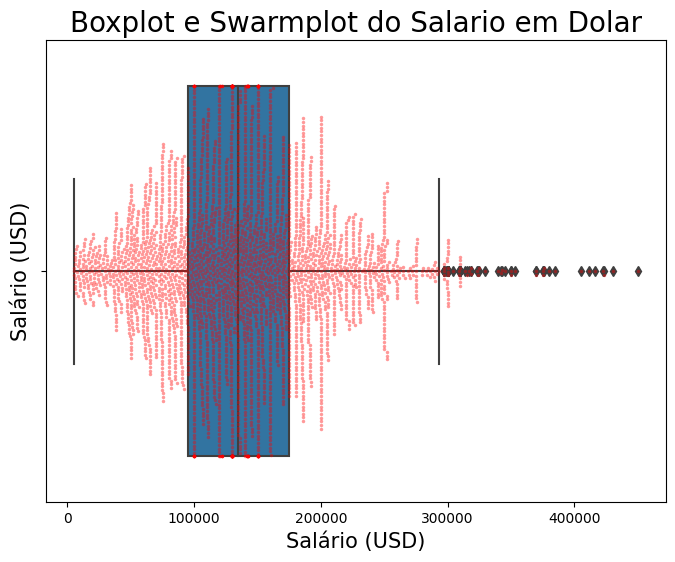

In [20]:
# Criação do boxplot e swarmplot da coluna   'salario_usd'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['salario_usd'])
sns.swarmplot(x=dataset['salario_usd'], color='red', alpha=0.4, size=2.5)
plt.ylabel('Salário (USD)',fontsize=15)
plt.xlabel('Salário (USD)',fontsize=15)
plt.title('Boxplot e Swarmplot do Salario em Dolar',fontsize=20)
plt.show()

Distribuição do nível de experiência:
A maioria das entradas no conjunto de dados é de indivíduos com experiência de nível sénior (SE), seguido de nível médio (MI), nível iniciante (EN) e nível executivo (EX). Poderemos precisar de mais informações para decifrar o significado exato destas abreviaturas, mas é evidente que o nível Sénior (SE) é o nível de experiência mais comum.

Distribuição do tipo de emprego:
A maioria dos indivíduos está empregada a tempo inteiro (FT), com apenas alguns a trabalhar a tempo parcial, por contrato ou como freelancer.

Distribuição do tamanho da empresa:
Um número significativo de pessoas trabalha em empresas de médio porte, seguidas pelas grandes e pequenas empresas.

Os 10 principais cargos:
Engenheiro de dados, cientista de dados e analista de dados são os três principais cargos no conjunto de dados, sendo o engenheiro de ML o mais comum.

Analise agora a forma como o salário varia consoante os diferentes factores através da Análise salarial.


### **3.2. Visualizações Unimodais**

Vamos criar agora um histograma para cada atributo numérico do dataset. Veremos que os atributos salario, ano  seguem uma distribuição exponencial, e que salario_usd segue uma distribuição aproximadamente normal.

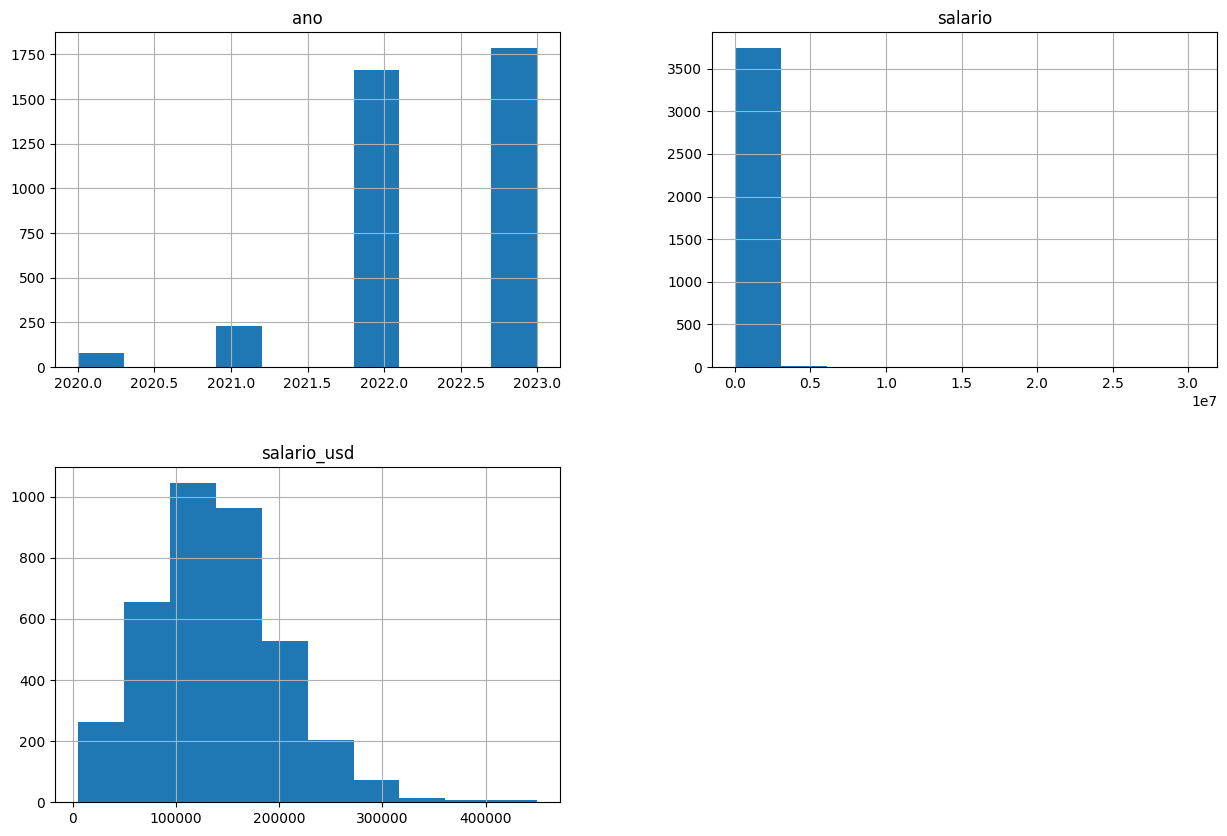

In [21]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

Distribuição do salário (em USD):

A maioria dos salários está agrupada em torno da extremidade inferior, indicando que a maioria dos profissionais de ciência de dados neste conjunto de dados ganha menos de US$ 200.000. Há alguns valores discrepantes na extremidade superior, que podem representar funções seniores ou funções altamente especializadas no domínio da ciência de dados.

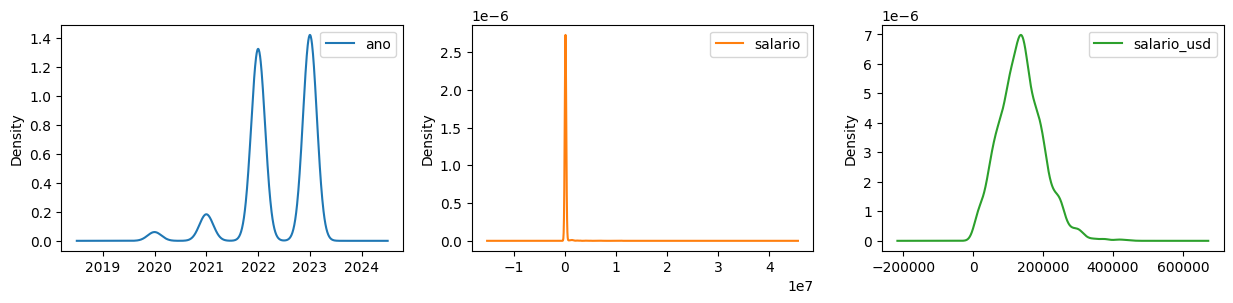

In [22]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()


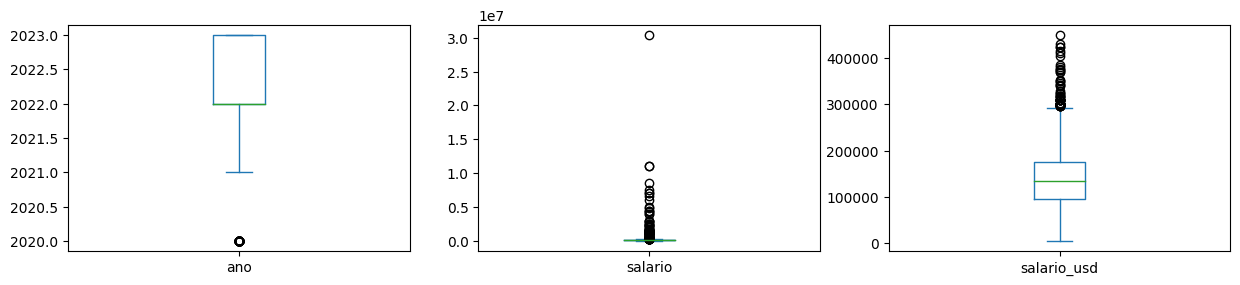

In [23]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

In [24]:
country_mapping = {
    'BR': 'Brazil','US': 'United States',
    'EU': 'European Union','IN': 'India',
    'HK': 'Hong Kong','PT': 'Portugal',
    'ES': 'Spain','CA': 'Canada',
    'CF': 'Central African Republic',
    'BE': 'Belgium','BA': 'Bosnia and Herzegovina',
    'AU': 'Australia','AT': 'Austria',
    'AS': 'American Samoa','DE': 'Germany',
    'GB': 'United Kingdom','AE': 'United Arab Emirates',
    'AM': 'Armenia','AR': 'Argentina',
    'DZ': 'Algeria','EE': 'Estonia',
    'EG': 'Egypt','FI': 'Finland',
    'FR': 'France','BG': 'Bulgaria',
    'BO': 'Bolivia','CH': 'Switzerland',
    'CL': 'Chile','CN': 'China',
    'CO': 'Colombia','CR': 'Costa Rica',
    'CY': 'Cyprus','CZ': 'Czech Republic',
    'DK': 'Denmark','GH': 'Ghana',
    'GR': 'Greece','HN': 'Honduras',
    'HR': 'Croatia','HU': 'Hungary',
    'ID': 'Indonesia','IE': 'Ireland',
    'IL': 'Israel','IQ': 'Iraq'
    }

In [25]:
# Mapear as localidades de 'local_job' para os países sede
import plotly.express as px

# Mapear as localidades de 'company_location' para os países sede
dataset['local_job'] = dataset['local_job'].map(country_mapping)

# Contar a quantidade de ocorrências de cada país na coluna 'company_location'
country_counts = dataset['local_job'].value_counts().reset_index()

# Renomear as colunas
country_counts.columns = ['local_job', 'count']

# Criar o gráfico de mapa
fig = px.choropleth(
    data_frame=country_counts,
    locations='local_job',
    locationmode='country names',
    color='count',
    color_continuous_scale='YlOrRd',
    range_color=(0, 100),
    labels={'count': 'Count'},
    title='Distribuição de Empregador por País'
)

# Exibir o gráfico
fig.show()

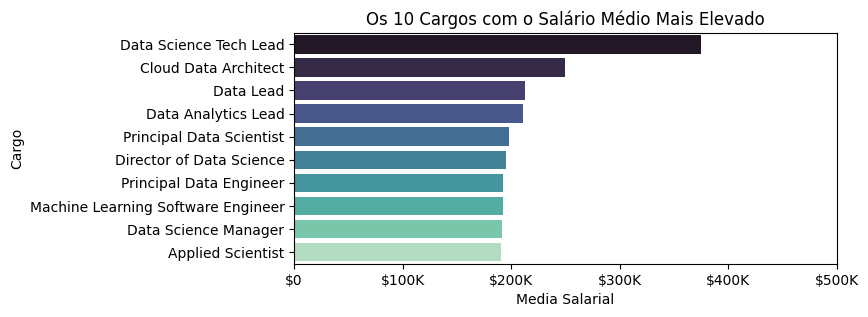

In [26]:
# Os 10 Cargos com o Salário Médio Mais Elevado
fig, axs = plt.subplots(figsize=(7, 3))
colors = sns.color_palette("mako", 10)

top_10_titles = dataset.groupby('cargo')['salario_usd'].mean().sort_values(ascending=False)[:10]

sns.barplot(x=top_10_titles.values, y=top_10_titles.index, ax=axs, palette=colors)
axs.set_title('Os 10 Cargos com o Salário Médio Mais Elevado')
axs.set_xlabel('Media Salarial')
axs.set_ylabel('Cargo')
axs.set_xticks([0, 100000, 200000, 300000, 400000, 500000])
axs.set_xticklabels(['$0', '$100K', '$200K', '$300K', '$400K', '$500K'])
plt.show()

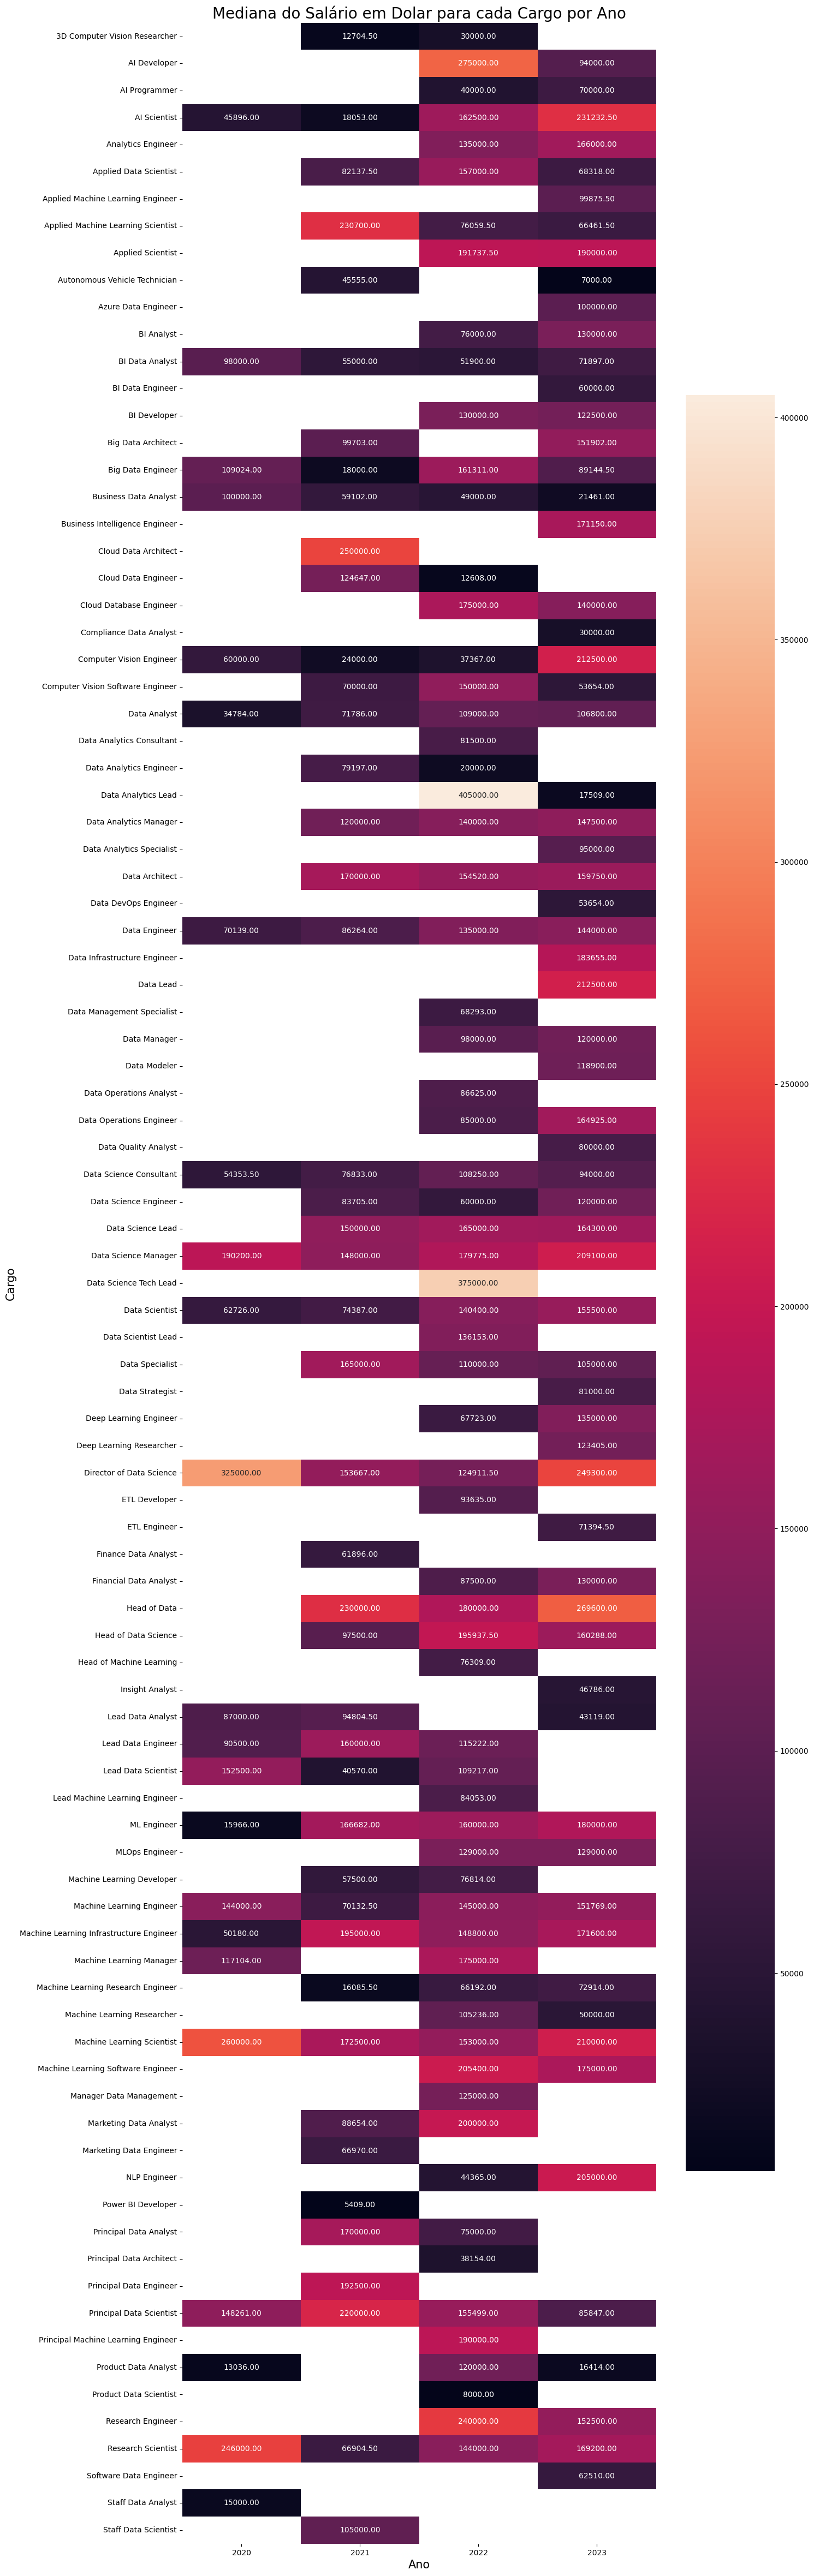

In [27]:
pivot_table = dataset.pivot_table(values='salario_usd', index='cargo', columns='ano', aggfunc='median')
plt.figure(figsize=(14, 60))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="rocket")
plt.title('Mediana do Salário em Dolar para cada Cargo por Ano',fontsize=20)
plt.xlabel('Ano',fontsize=15)
plt.ylabel('Cargo',fontsize=15)
plt.show()

A Análise  foi realizada em um  dataset em que a série histórica ficou comprometida , pois existem  informações faltantes em relação os cargos durante os 4 anos observado (2020-2023) , como verificado por exemplo , nesta visualização, existem informações  por exemplo, da função de Arquiteto de Big Data no anos de 2021 e 2023 e não existiu no ano de 2022 .

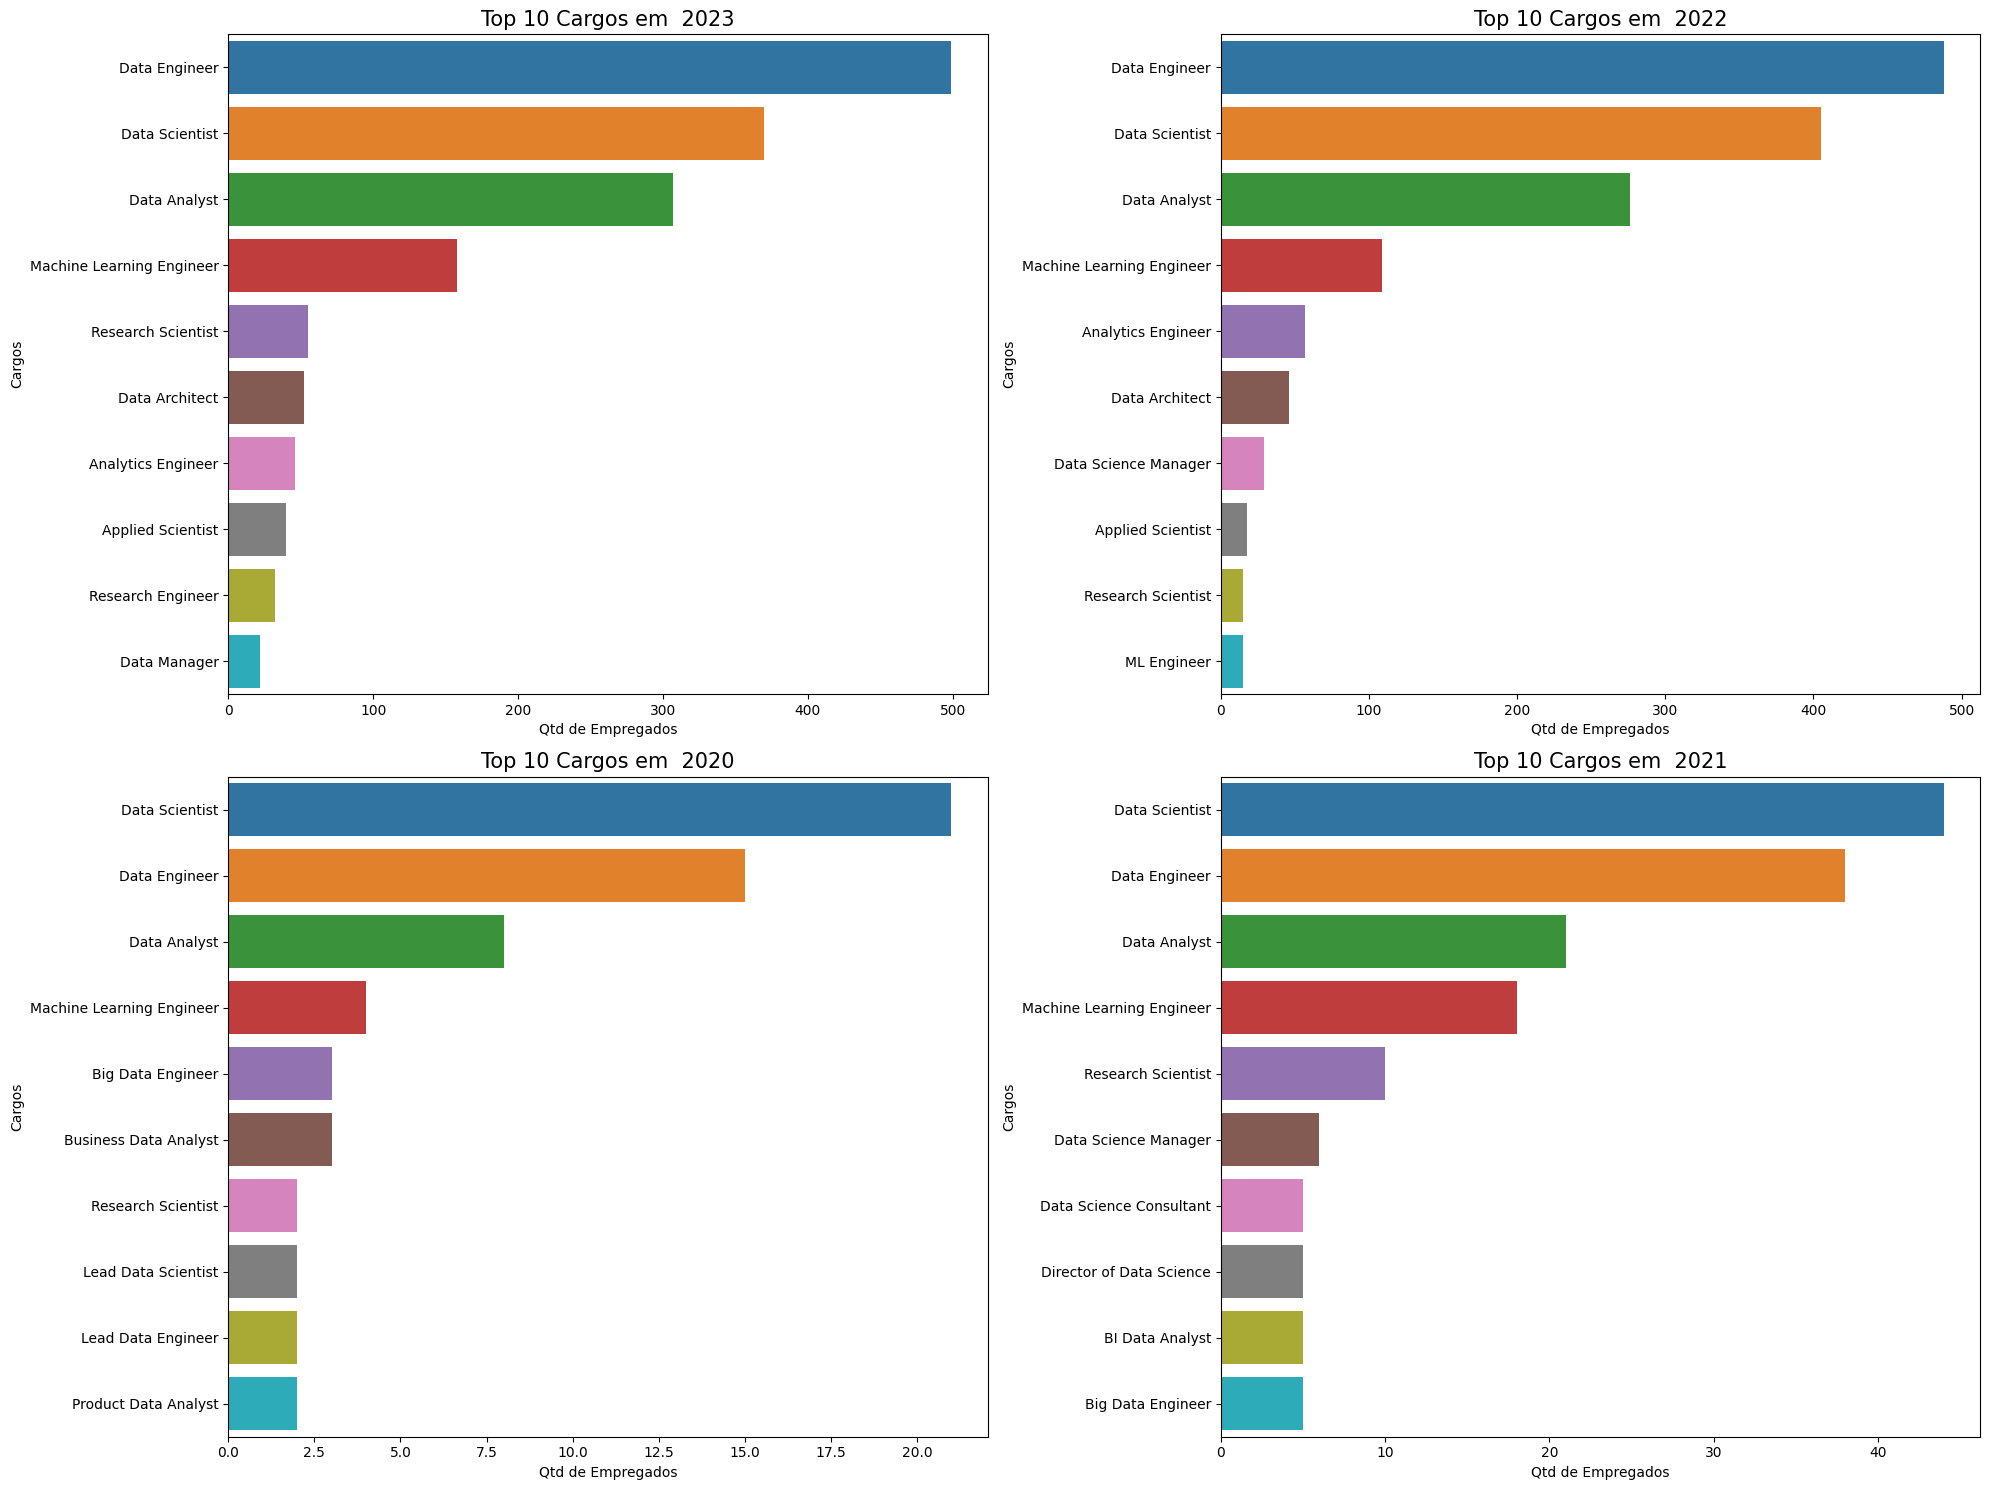

In [28]:
a = 2
b = 2
c = 1
fig = plt.figure(figsize = (20, 15))

years = sorted(df_orig['ano'].unique())
for year in dataset.ano.unique():
    dft = dataset[dataset['ano']==year]['cargo'].value_counts().nlargest(10).reset_index()
    plt.subplot(a, b, c)
    ax = sns.barplot(data = dft , y = dft['index'], x = dft.cargo)
    plt.ylabel('Cargos')
    plt.xlabel('Qtd de Empregados')
    plt.title(f'Top 10 Cargos em  {year}', size=15)
    c = c + 1 # the year starts from 2019 and when we add 1 it would be 2020 and the full analysis below
plt.tight_layout()
plt.show()

**Salário  vs. Nível de experiência:**
Há uma tendência clara de que, à medida que o nível de experiência aumenta, o salário médio também aumenta. A experiência de nível executivo (EX) tem o salário mediano mais elevado, seguido de nível de entrada (EN), nível médio (MI) e nível sénior (SE). A dispersão dos salários (indicada pela altura das caixas) também parece aumentar com a experiência, o que indica uma maior variabilidade nos salários das funções mais experientes.

**Salário vs. Tipo de emprego:**
Os empregados a tempo inteiro (FT) têm geralmente salários médios mais elevados em comparação com outros tipos de emprego. As funções com contrato (CT) e freelance (FL) têm distribuições salariais mais amplas, indicando variabilidade no mercado de contratos e freelance.

**Salário vs. Tamanho da empresa:**
As grandes empresas tendem a oferecer salários médios mais elevados em comparação com as médias e pequenas empresas. Isto pode dever-se ao facto de as empresas de maior dimensão terem mais recursos e atraírem, normalmente, talentos mais experientes.

**Salário vs. rácio de trabalho remoto:**
Não parece haver uma diferença significativa nos salários médios com base no percentual de trabalho remoto. No entanto, as funções totalmente remotas (100% remotas) têm um salário médio ligeir


Para aprofundar essa análise, vamos identificar quais variáveis estão mais fortemente correlacionadas com o aumento do salário médio ao longo do tempo. Além disso, pode explorar visualizações detalhadas, como gráficos de dispersão e mapas de calor, para destacar padrões específicos nos dados.

Além disso, ao examinar as mudanças nas proporções de cientistas de dados seniores e os cargos iniciantes ,  podem existir   fatores externos que possam influenciar essas tendências, como mudanças na demanda do mercado, avanços tecnológicos ou eventos econômicos.


### **3.3. Visualizações Multimodais**

A partir da matriz de correlação, podemos ver as relações entre as nossas variáveis numéricas. As variáveis com fortes correlações positivas ou negativas podem afetar o nosso modelo de aprendizagem automática.
Uma correlação indica uma relação entre duas variáveis, mas não nos diz se a alteração de uma variável causa a alteração da outra.



**Matriz de Correlação Heatmap**

In [29]:
categorical_columns = ['experiencia', 'tp_emprego', 'remoto_perc','porte']
numerical_columns = ['salario_usd']

In [30]:
dummy_variables = pd.get_dummies(dataset, columns=categorical_columns, drop_first=False)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(dataset[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)


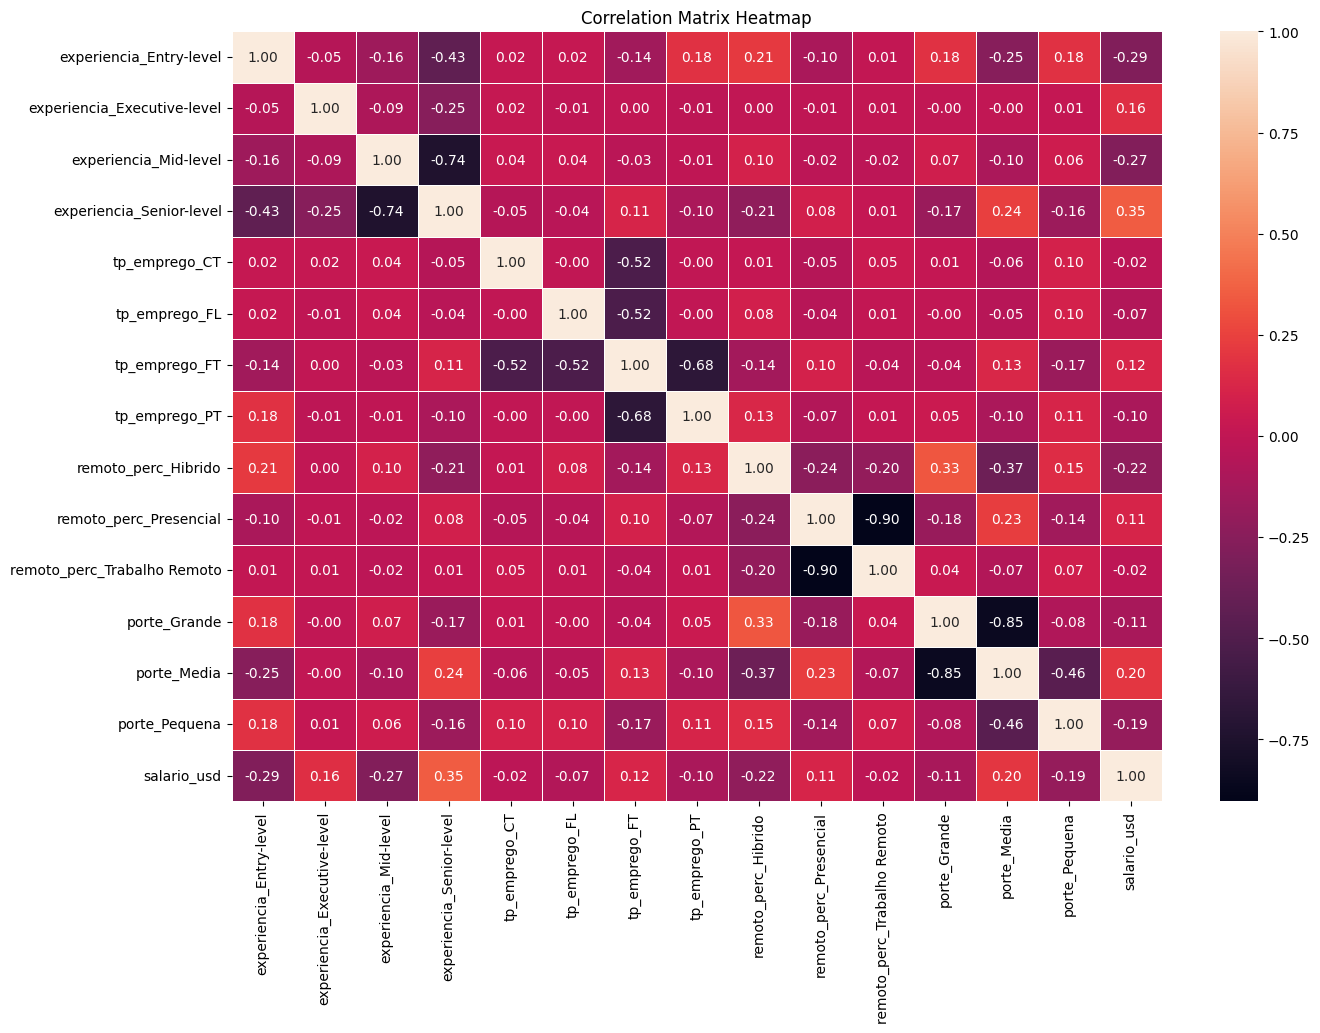

In [32]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['ano', 'salario'], axis=1)
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

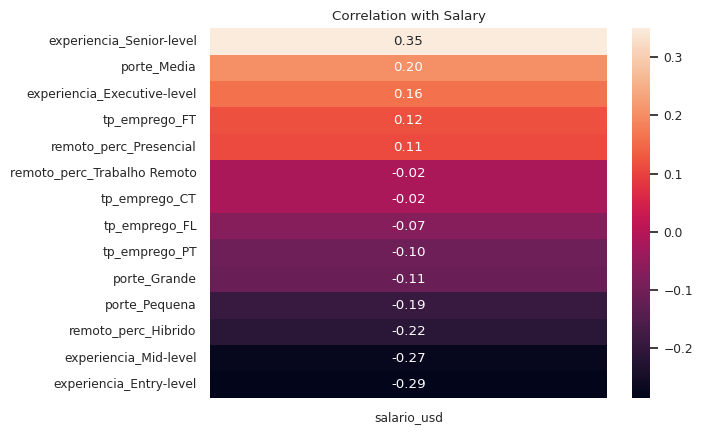

In [33]:
corr = processed_df.corr()
target_corr = corr['salario_usd'].drop('salario_usd')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="rocket", annot=True, fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

In [34]:
ds=dataset
# transformar variáveis em valores numéricos

ds['porte'] = ds['porte'].replace('Pequena', 1)
ds['porte'] = ds['porte'].replace('Media', 2)
ds['porte'] = ds['porte'].replace('Grande', 3)
#
ds['experiencia'] = ds['experiencia'].replace('Entry-level', 1)
ds['experiencia'] = ds['experiencia'].replace('Mid-level', 2)
ds['experiencia'] = ds['experiencia'].replace('Senior-level', 3)
ds['experiencia'] = ds['experiencia'].replace('Executive-level', 4)
#
ds['tp_emprego'] = ds['tp_emprego'].replace('PT', 1)
ds['tp_emprego'] = ds['tp_emprego'].replace('FL', 2)
ds['tp_emprego'] = ds['tp_emprego'].replace('CT', 3)
ds['tp_emprego'] = ds['tp_emprego'].replace('FT', 4)
#
ds['remoto_perc'] = ds['remoto_perc'].replace('Presencial', 0)
ds['remoto_perc'] = ds['remoto_perc'].replace('Trabalho Remoto', 2)
ds['remoto_perc'] = ds['remoto_perc'].replace('Hibrido', 3)


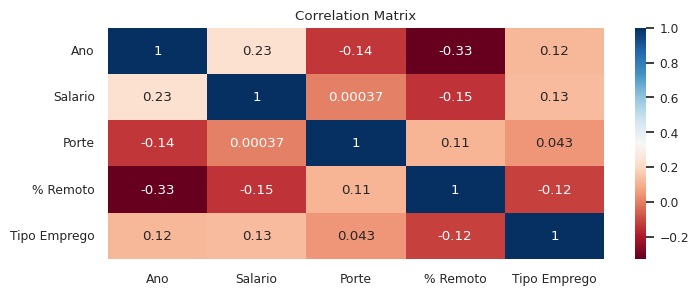

In [35]:
# plot correlation matrix between ano, salario, porte, experiencia
#
fig, axs = plt.subplots(figsize=(8, 3))
corr = dataset[['ano', 'salario_usd', 'porte', 'remoto_perc', 'tp_emprego']].corr()
sns.heatmap(corr, annot=True, ax=axs, cmap='RdBu')
axs.set_title('Correlation Matrix')
axs.set_xticklabels(['Ano', 'Salario', 'Porte', '% Remoto', 'Tipo Emprego'])
axs.set_yticklabels(['Ano', 'Salario', 'Porte', '% Remoto', 'Tipo Emprego'], rotation=0)
plt.show()


<i align="justified">O salário está positivamente correlacionado com o ano de trabalho, o que significa que os salários aumentaram desde 2020. O ano de trabalho está negativamente correlacionado com o trabalho remoto, uma vez que os trabalhadores começaram a regressar ao escritório após a pandemia. </i>

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

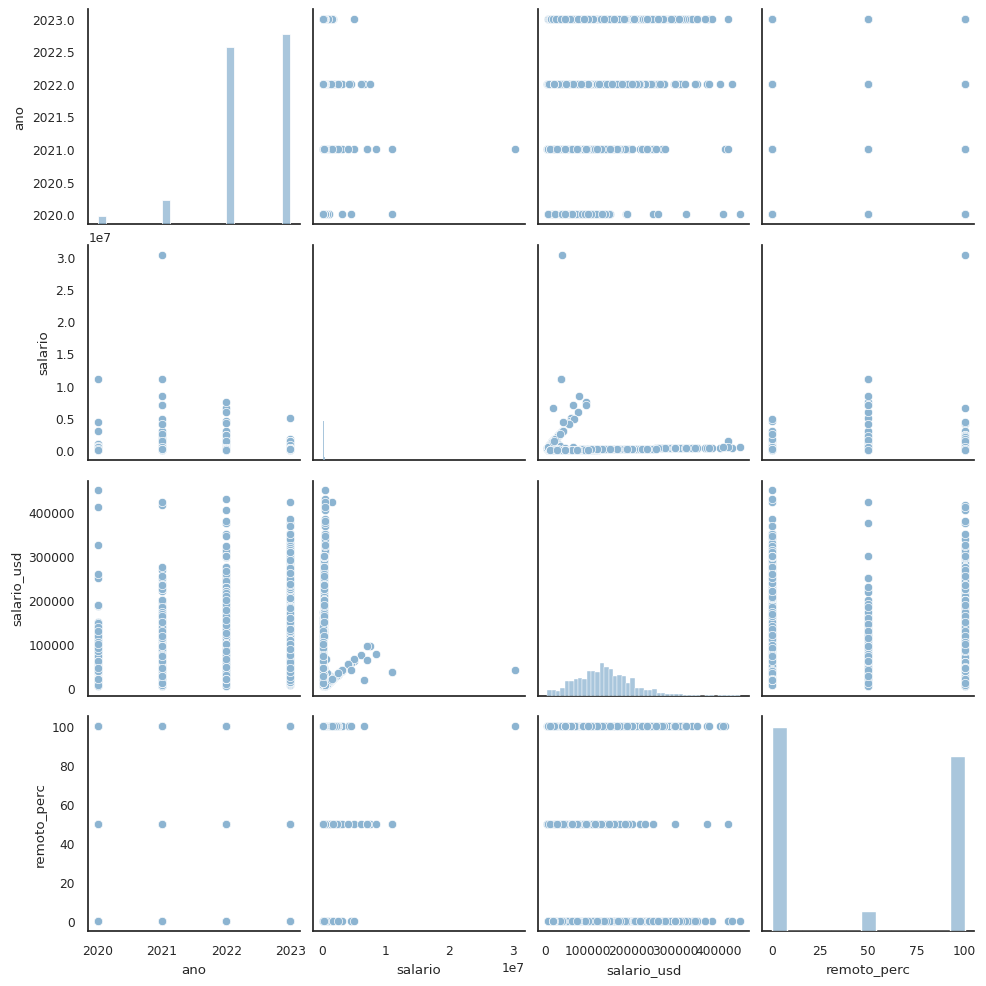

In [36]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(df_orig)

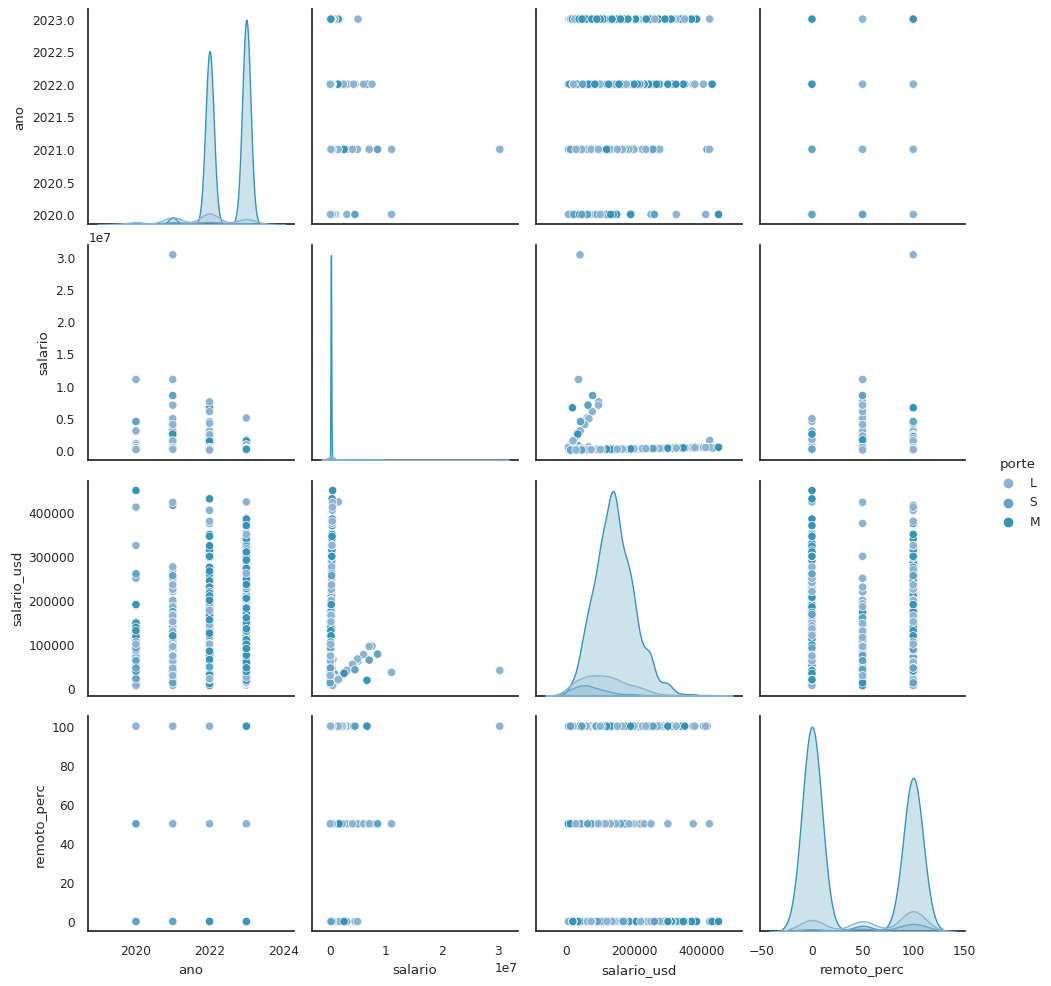

In [37]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(df_orig, hue = "porte", height = 2.5);

## **4. Pré-Processamento de dados**

### **4.1. Tratamento de Missings e Limpeza**

**Verificar Linhas Duplicatas**

In [38]:
df_orig = df_orig[['ano','experiencia', 'tp_emprego', 'cargo', 'salario',  'moeda',
                   'residencia' , 'remoto_perc','local_job', 'porte'  ,
    'salario_usd'
]]

In [39]:
duplicate_rows = df_orig[df_orig.duplicated()]
duplicate_rows.shape

(1171, 11)

In [40]:
# Quantidade de Registros antes da retirada de duplicidade
df_orig.shape

(3755, 11)

In [41]:
# Limpeza das linhas duplicatas
df_orig.drop_duplicates(keep='last', inplace = True)
df_orig.shape

(2584, 11)

**Verificar missings**


In [42]:
df_orig[df_orig.isnull().any(axis=1)]

,ano,experiencia,tp_emprego,cargo,salario,moeda,residencia,remoto_perc,local_job,porte,salario_usd


In [43]:
# verificando nulls no dataset
df_orig.isnull().sum()

ano            0
experiencia    0
tp_emprego     0
cargo          0
salario        0
moeda          0
residencia     0
remoto_perc    0
local_job      0
porte          0
salario_usd    0
dtype: int64

<Axes: >

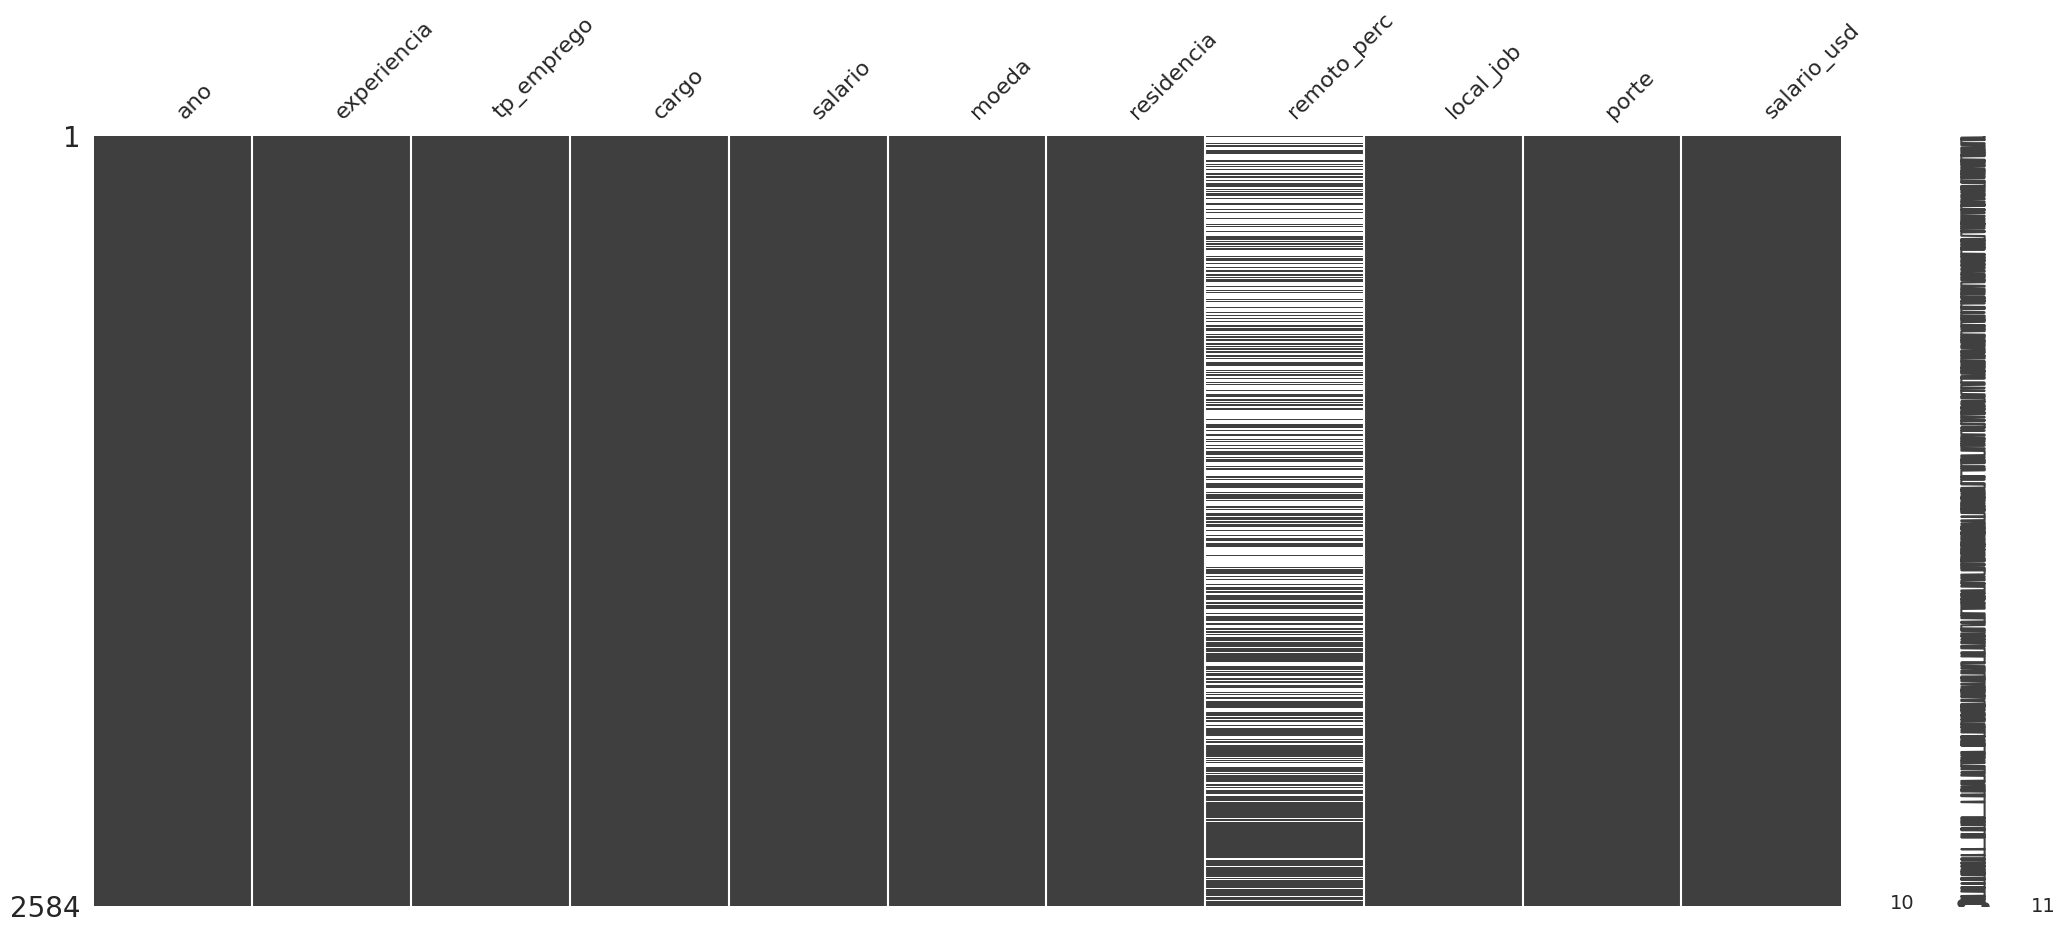

In [44]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(df_orig.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = df_orig[list(df_orig.columns)]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

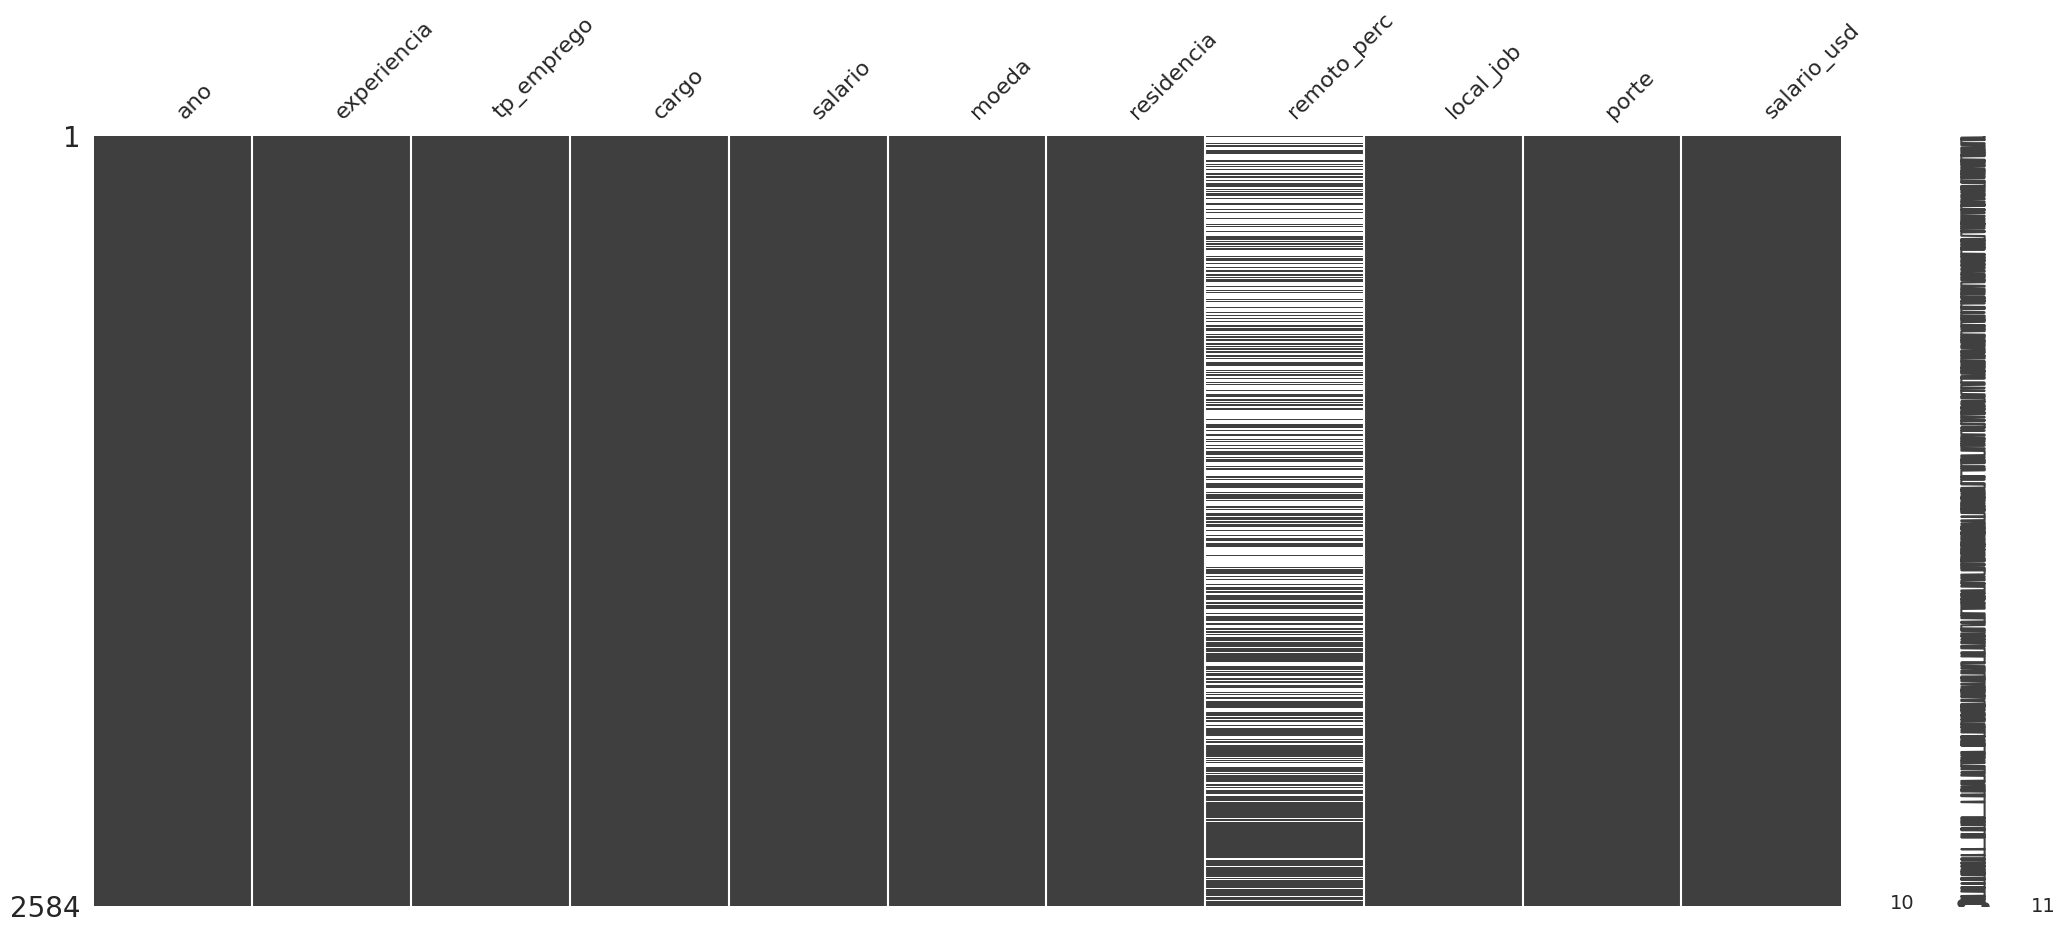

In [45]:
datasetSemMissings=pd.DataFrame(atributos)
# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

<Axes: >

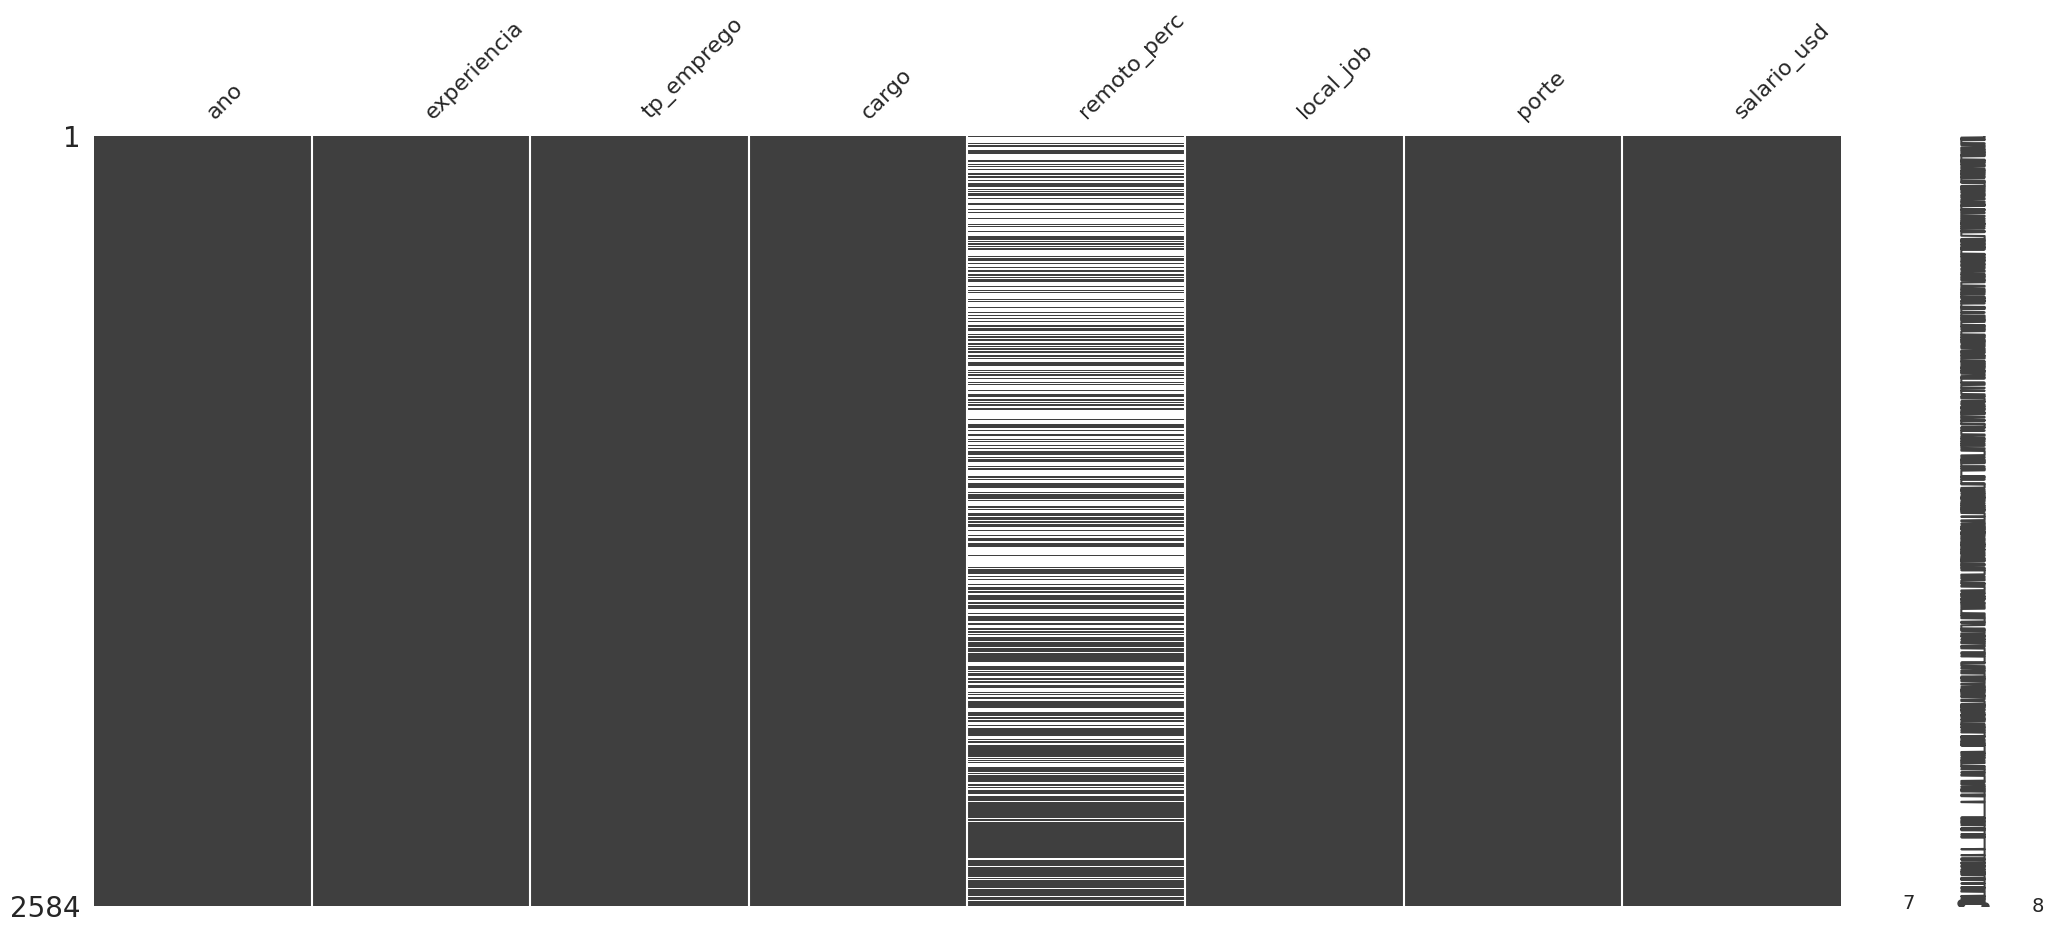

In [46]:
# removendo as colunas desnecessarias
atributos.drop(['moeda', 'salario', 'residencia' ], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)



<Axes: >

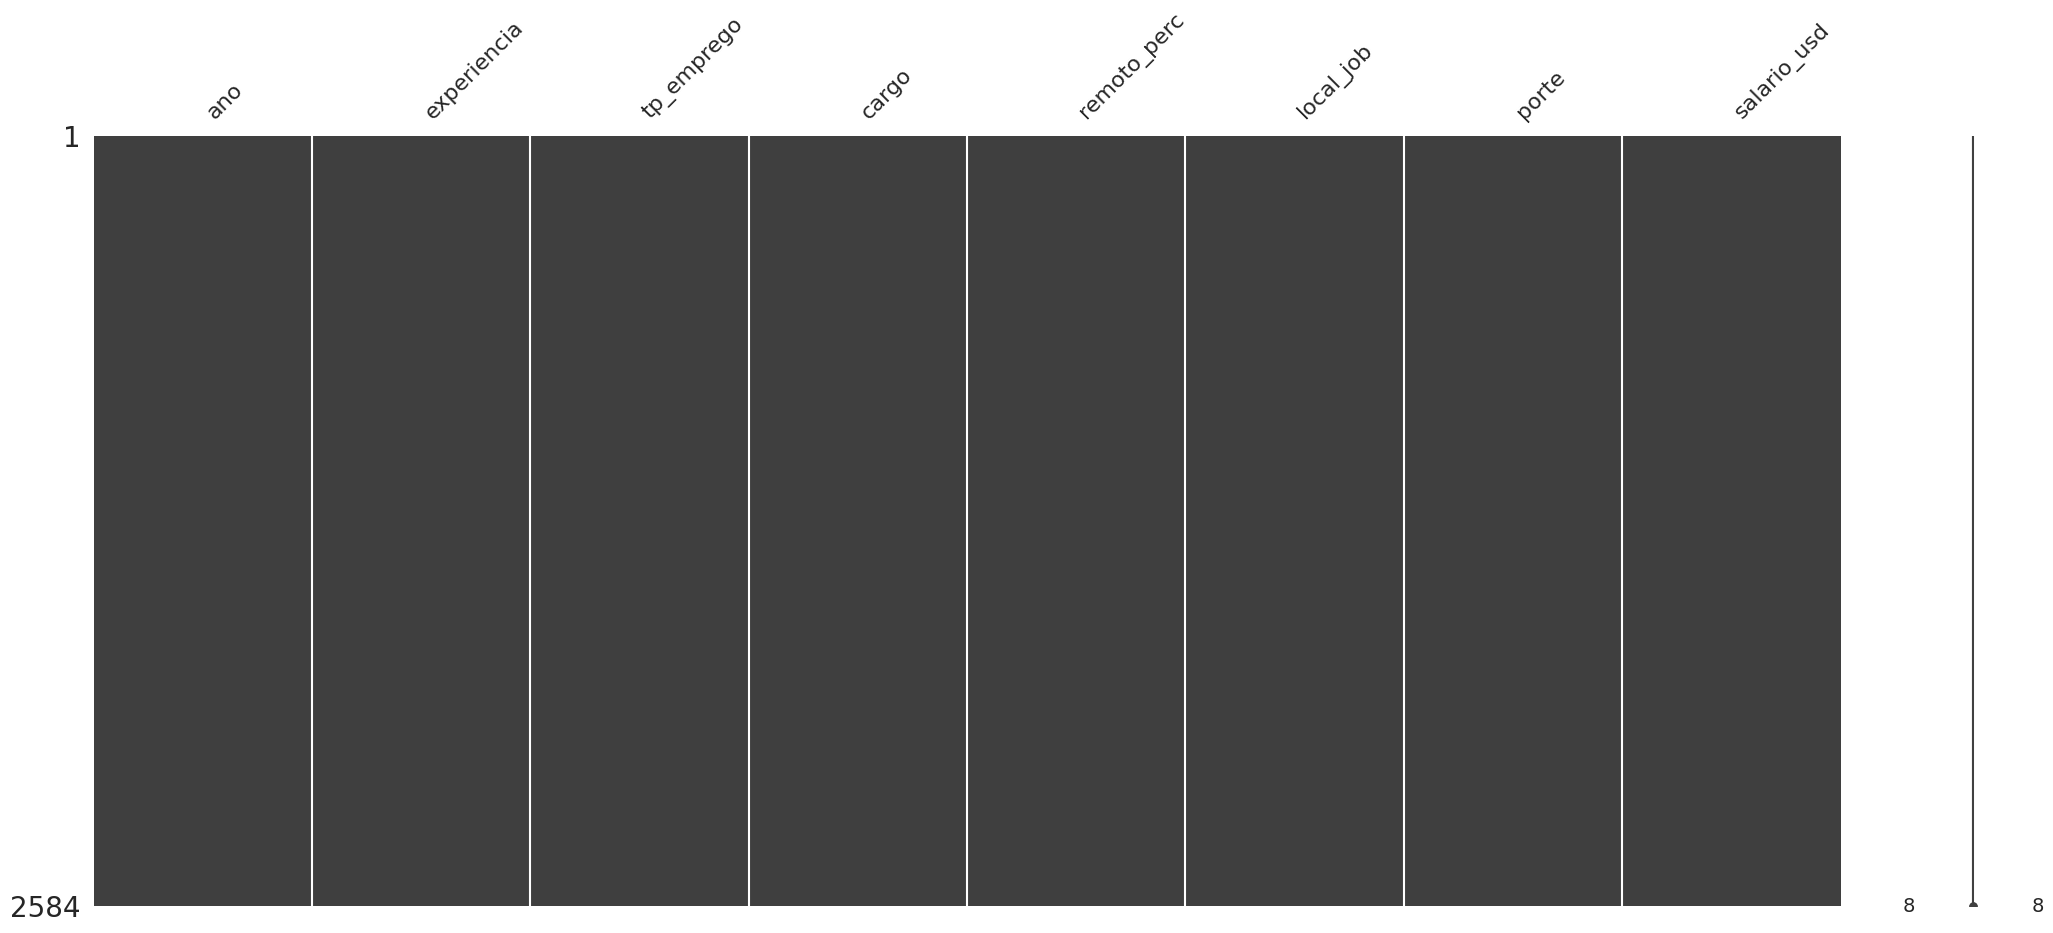

In [47]:
# substituindo os NaN dos campos de salário pela mediana da coluna
atributos['salario_usd'].fillna(atributos['salario_usd'].median(), inplace=True)

# Substituindo  os NaN por 0
atributos.replace(np.nan, 0, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [48]:
# verificando nulls no dataset tratado
datasetSemMissings=atributos
datasetSemMissings.isnull().sum()

ano            0
experiencia    0
tp_emprego     0
cargo          0
remoto_perc    0
local_job      0
porte          0
salario_usd    0
dtype: int64

### **4.2. Separação em conjunto de treino e conjunto de teste**

A separação de dados em conjuntos de treino e teste é crucial para avaliar a capacidade do modelo de machine learning em generalizar para novos dados. Ao treinar o modelo com um conjunto separado de dados de treino, você permite que ele aprenda padrões nos dados. O conjunto de teste, por sua vez, oferece uma avaliação objetiva do desempenho do modelo em dados não vistos anteriormente, simulando condições do mundo real. Essa prática ajuda a evitar overfitting, onde o modelo memoriza os dados de treino em vez de aprender padrões gerais, garantindo assim que o modelo seja mais robusto e eficaz ao lidar com novas informações, como salários não observados durante o treinamento.. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é Y que é o campo salario_usd.

De seguida, vamos pré-processar e dividir os nossos dados num conjunto de treino e num conjunto de teste. Utilizaremos 80% dos dados para treino e 20% para teste.


**Separação Treino e Teste do Dataset Original**

In [49]:
print(df_orig.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano          2584 non-null   int64 
 1   experiencia  2584 non-null   object
 2   tp_emprego   2584 non-null   object
 3   cargo        2584 non-null   object
 4   salario      2584 non-null   int64 
 5   moeda        2584 non-null   object
 6   residencia   2584 non-null   object
 7   remoto_perc  2584 non-null   int64 
 8   local_job    2584 non-null   object
 9   porte        2584 non-null   object
 10  salario_usd  2584 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 242.2+ KB
None


In [50]:
# Proporção do Treino|Teste
test_size = 0.20
seed = 7


In [51]:
# Separação em conjuntos de treino e teste (dataset original)
array = df_orig.values

# separando o array em componentes de input e output
X = array[:,0:9]
y = array[:,9]
#
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

**Separação Treino e Teste do Dataset sem  Missings**

In [52]:
datasetSemMissings

,ano,experiencia,tp_emprego,cargo,remoto_perc,local_job,porte,salario_usd
0,2023,SE,FT,Principal Data Scientist,100.0,ES,L,85847
1,2023,MI,CT,ML Engineer,100.0,US,S,30000
2,2023,MI,CT,ML Engineer,100.0,US,S,25500
3,2023,SE,FT,Data Scientist,100.0,CA,M,175000
4,2023,SE,FT,Data Scientist,100.0,CA,M,120000
...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,100.0,US,L,412000
3751,2021,MI,FT,Principal Data Scientist,100.0,US,L,151000
3752,2020,EN,FT,Data Scientist,100.0,US,S,105000
3753,2020,EN,CT,Business Data Analyst,100.0,US,L,100000


In [53]:

# Separação em conjuntos de treino e teste (dataset sem missings - 352 colunas a menos!)
array = datasetSemMissings.values

# separando o array em componentes de input e output
X_sm = array[:,0:6]
y_sm = array[:,6]

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

In [54]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X_sm = datasetSemMissings.values[:,0:7]
Y_sm = datasetSemMissings.values[:,7]

**Codificação Ordinal**

In [62]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X_sm)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[ 3.  3.  2. 84.  2. 25.  0.]
 [ 3.  2.  0. 66.  2. 70.  2.]
 [ 3.  2.  0. 66.  2. 70.  2.]
 [ 3.  3.  2. 47.  2. 12.  1.]
 [ 3.  3.  2. 47.  2. 12.  1.]]


**One-hot encoding**

In [60]:
 datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             2584 non-null   int64  
 1   cargo           2584 non-null   object 
 2   remoto_perc     2584 non-null   float64
 3   local_job       2584 non-null   object 
 4   salario_usd     2584 non-null   int64  
 5   porte_L         2584 non-null   uint8  
 6   porte_M         2584 non-null   uint8  
 7   porte_S         2584 non-null   uint8  
 8   experiencia_EN  2584 non-null   uint8  
 9   experiencia_EX  2584 non-null   uint8  
 10  experiencia_MI  2584 non-null   uint8  
 11  experiencia_SE  2584 non-null   uint8  
 12  tp_emprego_CT   2584 non-null   uint8  
 13  tp_emprego_FL   2584 non-null   uint8  
 14  tp_emprego_FT   2584 non-null   uint8  
 15  tp_emprego_PT   2584 non-null   uint8  
dtypes: float64(1), int64(2), object(2), uint8(11)
memory usage: 148.9+ KB


In [56]:
 datasetSemMissings = pd.get_dummies(data=datasetSemMissings, columns=['porte','experiencia','tp_emprego'])
 datasetSemMissings.head()

,ano,cargo,remoto_perc,local_job,salario_usd,porte_L,porte_M,porte_S,experiencia_EN,experiencia_EX,experiencia_MI,experiencia_SE,tp_emprego_CT,tp_emprego_FL,tp_emprego_FT,tp_emprego_PT
0,2023,Principal Data Scientist,100.0,ES,85847,1,0,0,0,0,0,1,0,0,1,0
1,2023,ML Engineer,100.0,US,30000,0,0,1,0,0,1,0,1,0,0,0
2,2023,ML Engineer,100.0,US,25500,0,0,1,0,0,1,0,1,0,0,0
3,2023,Data Scientist,100.0,CA,175000,0,1,0,0,0,0,1,0,0,1,0
4,2023,Data Scientist,100.0,CA,120000,0,1,0,0,0,0,1,0,0,1,0


In [57]:
 datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ano             2584 non-null   int64  
 1   cargo           2584 non-null   object 
 2   remoto_perc     2584 non-null   float64
 3   local_job       2584 non-null   object 
 4   salario_usd     2584 non-null   int64  
 5   porte_L         2584 non-null   uint8  
 6   porte_M         2584 non-null   uint8  
 7   porte_S         2584 non-null   uint8  
 8   experiencia_EN  2584 non-null   uint8  
 9   experiencia_EX  2584 non-null   uint8  
 10  experiencia_MI  2584 non-null   uint8  
 11  experiencia_SE  2584 non-null   uint8  
 12  tp_emprego_CT   2584 non-null   uint8  
 13  tp_emprego_FL   2584 non-null   uint8  
 14  tp_emprego_FT   2584 non-null   uint8  
 15  tp_emprego_PT   2584 non-null   uint8  
dtypes: float64(1), int64(2), object(2), uint8(11)
memory usage: 148.9+ KB


In [66]:
datasetSemMissings.nunique()

ano                  4
cargo               93
remoto_perc          3
local_job           72
salario_usd       1035
porte_L              2
porte_M              2
porte_S              2
experiencia_EN       2
experiencia_EX       2
experiencia_MI       2
experiencia_SE       2
tp_emprego_CT        2
tp_emprego_FL        2
tp_emprego_FT        2
tp_emprego_PT        2
dtype: int64

## **Conclusão**

Nesta análise, torna-se evidente que, para aqueles que procuram uma remuneração de topo no domínio da ciência dos dados, certas escolhas estratégicas podem conduzir a uma remuneração significativamente mais elevada. Em primeiro lugar, definir a trajetória de carreira para o continente Norte Americano, onde se situam alguns dos principais centros tecnológicos do mundo, parece ser uma atitude sensata. Os nossos dados sugerem fortemente que tanto viver como trabalhar nesta região pode aumentar significativamente o potencial de ganhos de um profissional de dados.


Em segundo lugar, este estudo sublinha o valor da especialização no setor. Especificamente, a função de Engenheiro de Dados parece ter um salário médio mais elevado do que a função de Analista, o que aponta para o aumento da procura e do valor associado a esta especialização.


Por último, a longevidade e a experiência no sector desempenham um papel crucial na remuneração. É evidente que os Cientistas de Dados com experiência tendem a receber salários médios consideravelmente mais elevados. Isto confirma a afirmação de que o investimento contínuo no conjunto de competências e no crescimento profissional dentro do sector pode gerar recompensas financeiras significativas ao longo do tempo.


Em suma, para aqueles que aspiram a maximizar os seus ganhos na ciência dos dados, estas conclusões fornecem um roteiro: visar empresas norte-americanas, considerar a possibilidade de orientar a sua carreira para a engenharia de dados e empenhar-se no crescimento e desenvolvimento a longo prazo no sector. Este planeamento estratégico, orientado por uma análise informada, pode muito bem abrir caminho não só para uma carreira gratificante.
